In [1]:
import pandas as pd

DATA_PATH = 'golf_df.xlsx'

df = pd.read_excel(DATA_PATH)
df.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['clima']   = le.fit_transform(df['clima'])
df['temp']    = le.fit_transform(df['temp'])
df['umidade'] = le.fit_transform(df['umidade'])
df['vento']   = le.fit_transform(df['vento'])

In [3]:
X = df.drop(columns=['jogar'])
y = df['jogar']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lgr.predict(X_test))
cm

array([[0, 1],
       [0, 2]], dtype=int64)

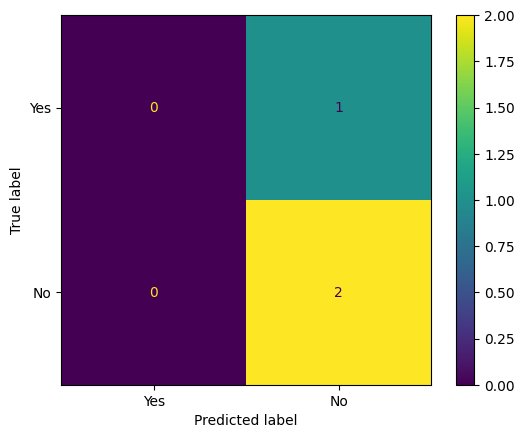

In [7]:
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(cm, display_labels=['Yes', 'No'])

cm_display.plot()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

print(f'The Logistic Regression model accuracy was {(accuracy_score(y_test, lgr.predict(X_test)) * 100).round(2)}%')

The Logistic Regression model accuracy was 66.67%
